In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
path = "R:/IISc/Sem 2/PRNN/Assignments/assignment-3-files/Board/board_data_25.txt"

In [38]:
data = pd.read_csv(path, header=None)

In [39]:
data

,0,1,2
0,-0.9741,-0.5889,3
1,0.9959,-0.7082,2
2,0.7020,0.7082,3
3,0.8805,-0.7997,2
4,-0.1456,-0.2302,3
...,...,...,...
7995,-0.8205,-0.8443,3
7996,0.5034,-0.5708,1
7997,-0.0696,-0.9195,1
7998,0.1179,0.2167,3


In [40]:
X = np.array(data.iloc[:, :2])
y = np.array(data.iloc[:, 2])
# y = y.reshape((y.shape[0], 1))

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# Y_train = ohe.fit_transform(y_train).toarray()
# Y_test = ohe.fit_transform(y_test).toarray()

In [44]:
from sklearn.svm import SVC

In [14]:
from sklearn.model_selection import GridSearchCV
C_range = [0.1, 1, 10, 100, 100]
gamma_range = [100, 10, 1, 0.1, 0.01]
degree_range =[6]
# gamma_range = [1]
# degree_range = [1]
param_grid = {'C': C_range, 'gamma': gamma_range, 'degree':degree_range, 'kernel': ['poly']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [24]:
res = grid.cv_results_['mean_test_score']
res = res.reshape((len(C_range), len(gamma_range)))
res

array([[0.1340625 , 0.133125  , 0.1065625 , 0.30375   , 0.30375   ],
       [0.13421875, 0.13390625, 0.1065625 , 0.2490625 , 0.30375   ],
       [0.1340625 , 0.13390625, 0.10640625, 0.10390625, 0.32484375],
       [0.1340625 , 0.13390625, 0.1065625 , 0.11359375, 0.32734375],
       [0.13390625, 0.13390625, 0.1065625 , 0.10953125, 0.23765625]])

Text(0.5, 1.0, 'Gaussian RBF Training accuracy after cross validated grid search')

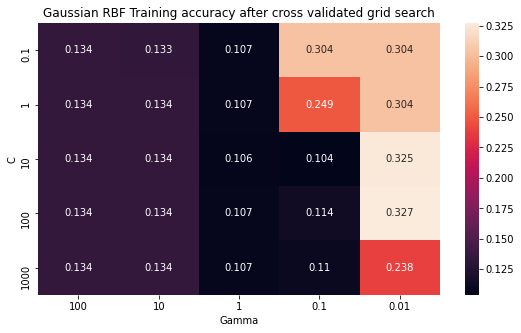

In [25]:
plt.figure(figsize=(9, 5))
sns.heatmap(res, annot=True, fmt='.3g', xticklabels=gamma_range, yticklabels=C_range)
plt.xlabel("Gamma")
plt.ylabel("C")
plt.title("Gaussian RBF Training accuracy after cross validated grid search")

In [26]:
grid.best_estimator_.fit(X_train, y_train)

SVC(C=100, degree=1, gamma=0.01, kernel='sigmoid')

In [27]:
list(grid.best_estimator_.predict(X_test) == y_test).count(True)/X_test.shape[0]

0.293125

In [28]:
grid.best_estimator_.n_support_

array([1461, 1426, 1569, 1944])

In [16]:
grid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [1],
                         'gamma': [10, 1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=3)

In [45]:
clf = SVC(C=10, gamma=10, degree=4, kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=10, degree=4, gamma=10)

In [46]:
list(clf.predict(X_train) == y_train).count(True)/X_train.shape[0]

0.7509375

In [47]:
list(clf.predict(X_test) == y_test).count(True)/X_test.shape[0]

0.728125

In [48]:
clf.n_support_

array([944, 904, 969, 937])

<AxesSubplot:>

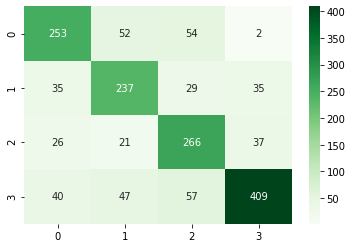

In [49]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(clf.predict(X_test), y_test), annot=True, fmt='.3g', cmap='Greens')

Text(0.5, 1.0, 'Support vectors for the Gaussian RBF kernel part c)')

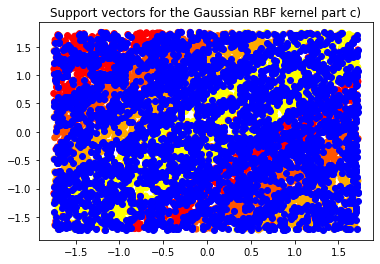

In [50]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn')
plt.scatter(X_train[clf.support_, 0], X_train[clf.support_, 1], c='blue')
plt.title("Support vectors for the Gaussian RBF kernel part c)")